# Model Training with Algerian Forest Fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cleaned_Algerian_Forest_Fires.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0


In [6]:
x = df.drop('FWI',axis=1)
y = df.FWI

## Spliting the dataset into Train and Test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

## Multicolinearity

In [9]:
xx = x_train.corr()

In [10]:
xx

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [11]:
def multicolinearity(dataset,threshold) :
    
    columns_corr = set()
    x_train_corr = x_train.corr()
    
    for i in range(len(x_train_corr)) :
        for j in range(i) :
            
            if abs((x_train_corr.iloc[i,j]) > threshold):
                columns_corr.add(x_train_corr.columns[i])
                
    return columns_corr

In [12]:
multicolinearity(xx,0.80)

{'BUI', 'DC'}

In [13]:
x_train.drop(['BUI','DC'],axis=1,inplace=True)
x_test.drop(['BUI','DC'],axis=1,inplace=True)

In [14]:
x_train.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1


In [15]:
x_test.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1


## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

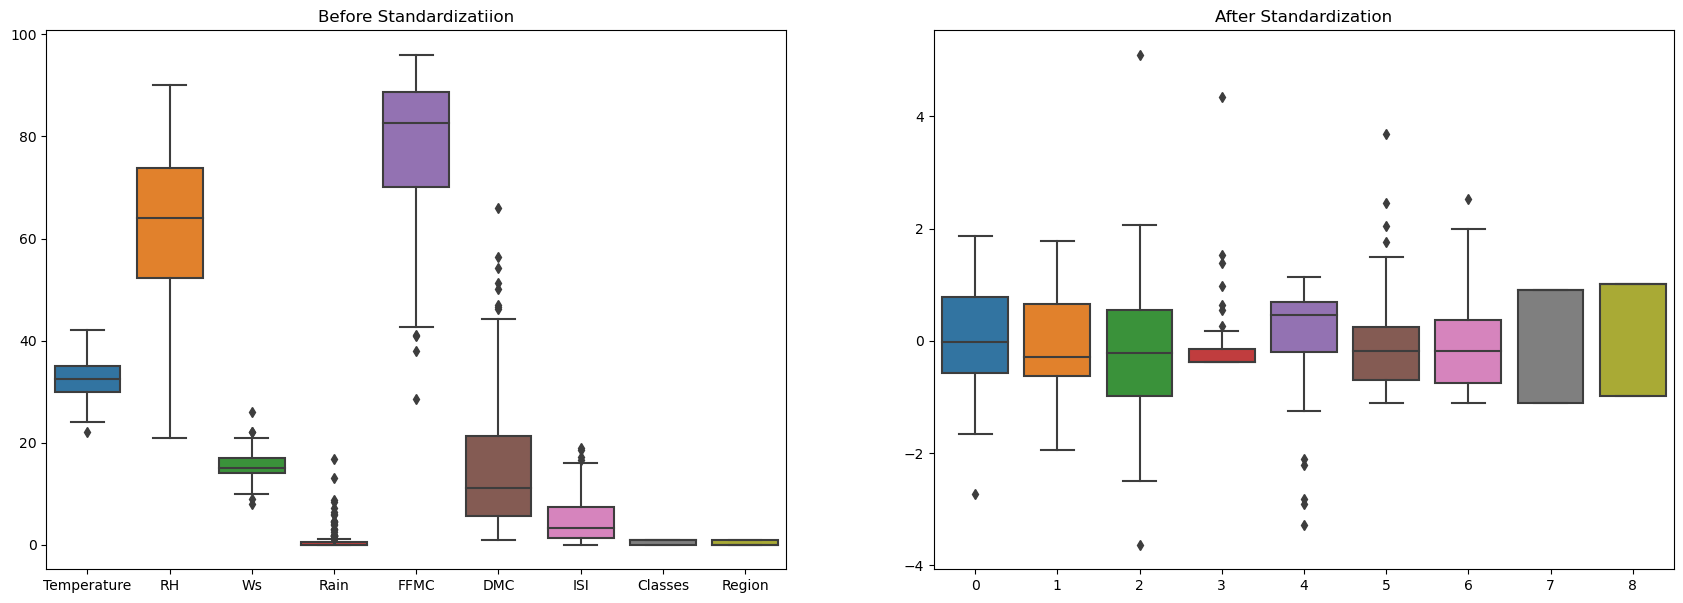

In [19]:
plt.subplots(figsize=(21,7))
plt.subplot(121)
sns.boxplot(data=x_train)
plt.title('Before Standardizatiion')
plt.subplot(122)
sns.boxplot(data=x_test_std)
plt.title('After Standardization')
plt.show()

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(x_train_std,y_train)

LinearRegression()

In [25]:
predicted_y = regressor.predict(x_test_std)

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mae = mean_absolute_error(y_test,predicted_y)

In [28]:
mae

0.5468236465249985

In [29]:
from sklearn.metrics import r2_score

In [30]:
acc = r2_score(y_test,predicted_y)

In [31]:
acc

0.9847657384266951

## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge = Ridge()

In [34]:
ridge.fit(x_train_std,y_train)

Ridge()

In [35]:
predicted_y_ridge = ridge.predict(x_test_std)

In [36]:
mean_absolute_error(y_test,predicted_y_ridge)

0.5642305340105692

In [37]:
r2_score(y_test,predicted_y_ridge)

0.9842993364555513

## Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

In [39]:
lasso = Lasso()

In [40]:
lasso.fit(x_train_std,y_train)

Lasso()

In [41]:
predicted_y_lasso = lasso.predict(x_test_std)

In [42]:
mean_absolute_error(y_test,predicted_y_lasso)

1.133175994914409

In [43]:
r2_score(y_test,predicted_y_lasso)

0.9492020263112388

## ElasticNet Regression

In [44]:
from sklearn.linear_model import ElasticNet

In [45]:
en = ElasticNet()

In [46]:
en.fit(x_train_std,y_train)

ElasticNet()

In [47]:
predicted_y_elasticnet = en.predict(x_test_std)

In [48]:
mean_absolute_error(y_test,predicted_y_elasticnet)

1.8822353634896005

In [49]:
r2_score(y_test,predicted_y_elasticnet)

0.8753460589519703

## Pickling

In [50]:
import pickle

In [51]:
pickle.dump(scaler,open('SCALER.pkl','wb'))
pickle.dump(regressor,open('REGRESSOR.pkl','wb'))